<a href="https://colab.research.google.com/github/Shaddynetwork/unsupervised-predict-streamlit-template/blob/shaddy-one/recommender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Problem Statement

## 2. Overview 

## 3. Importing ncessary libraries

In [1]:

# Data importation and EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
%matplotlib inline
pd.set_option('display.max_colwidth', None)


## 4. Importing the data 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!unzip /content/gdrive/MyDrive/UNSUPERVISED/exploreUnsupervised.zip

Archive:  /content/gdrive/MyDrive/UNSUPERVISED/exploreUnsupervised.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace genome_tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace imdb_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
# let us read in the data files

genome_data = pd.read_csv('/content/genome_scores.csv')
genome_tags_data = pd.read_csv('/content/genome_tags.csv')
imdb_data = pd.read_csv('/content/imdb_data.csv')
links_data = pd.read_csv('/content/links.csv')
movies_data = pd.read_csv('/content/movies.csv')
tags_data = pd.read_csv('/content/tags.csv')
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

## 5. Exploratory Data Analysis (EDA)

### 5.1 Viewing the content of each data

In [10]:
data_list = [genome_data, genome_tags_data,imdb_data,links_data,movies_data,tags_data, test_data,train_data]
names = ['genome_data', 'genome_tags_data','imdb_data','links_data','movies_data','tags_data', 'test_data','train_data'] 

In [11]:
i=0
for data in data_list:
  print(names[i].upper())
  i=i+1
  print(data.head(3))
  print('==========================')
  print(" ")

GENOME_DATA
   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
 
GENOME_TAGS_DATA
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
 
IMDB_DATA
   movieId  \
0        1   
1        2   
2        3   

                                                                                                                                                                                                                          title_cast  \
0                                 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste   
1  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup

### 5.2 Summary of each data

In [12]:
j=0
for data in data_list:
  print(names[j].upper())
  j=j+1
  print(data.info())
  print('==========================')
  print(" ")

GENOME_DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None
 
GENOME_TAGS_DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None
 
IMDB_DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-nu

## 5.3 Let us merge the train_data and movie data on the id column

In [6]:
# merging and inspecting the firt few rows of the data set
movies = movies_data.merge(train_data, on='movieId')
movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


## 5.4 Let us create new features for our analysis
- Average rating and rating count

In [23]:
movies_average_rating = movies.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Which Way Home (2009),5.0
1,Kaakha Kaakha (2003),5.0
2,Not Quite Human II (1989),5.0
3,Selling Isobel (2018),5.0
4,Sehar (2005),5.0


In [24]:
movies_rating_count=movies.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1,3.0
1,Love's Coming (2014),1,2.5
2,Love's Brother (2004),1,1.5
3,Love's Abiding Joy (2006),1,3.5
4,Love on the Dole (1941),1,3.0


- creating a date feature

In [13]:
import datetime as dt
movies['date'] = movies['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [34]:
movies.head(2)

,movieId,title,genres,userId,rating,timestamp,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786,2001-07-09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155,1999-11-15


In [35]:
movies.tail(2)

,movieId,title,genres,userId,rating,timestamp,date
10000036,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826,2019-11-20
10000037,209171,Women of Devil's Island (1962),Action|Adventure|Drama,119571,3.0,1574291937,2019-11-20


## Time Series Analysis

In [34]:
df = movies.copy()

In [35]:
df.date = pd.to_datetime(df['date'])

In [12]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 534.1+ MB


In [146]:
df2 = df.groupby([df['date'].dt.year.rename('year')]).agg({'count'})
df2 = df2.droplevel(0, axis=1) 
column_names = df2.columns.values
column_names[2] = 'number'
df2.columns = column_names
df2 = df2.drop('count',axis=1)


In [147]:
df2.head()

,number
year,
1995,1
1996,571027
1997,250543
1998,108811
1999,424201


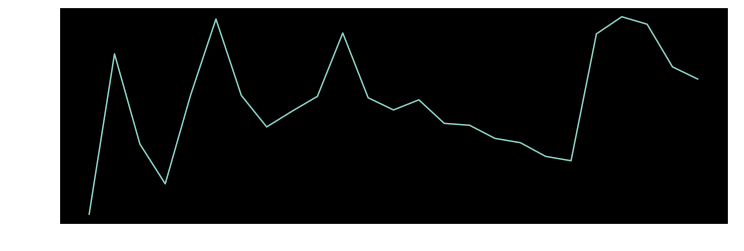

In [150]:
df2 = df2.reset_index()
plt.figure(figsize=(12,4))
plt.plot(df2['year'],df2['number'])
plt.savefig('numbermovies.jpg')

In [151]:
df3 = df.groupby([df['date'].dt.month.rename('month')]).agg({'count'})
df3 = df3.droplevel(0, axis=1) 
column_names = df3.columns.values
column_names[2] = 'number'
df3.columns = column_names
df3 = df3.drop('count',axis=1)

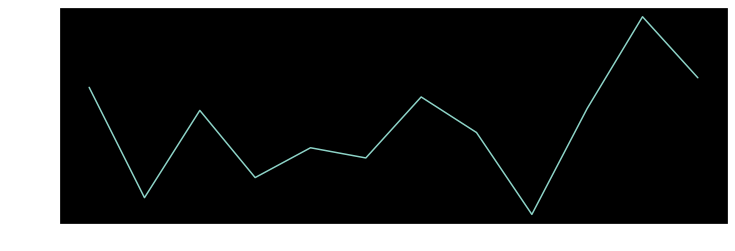

In [153]:
df3 = df3.reset_index()
plt.figure(figsize=(12,4))
plt.plot(df3['month'],df3['number'])
plt.savefig('numbermovies_month.jpg')

### visualizing the average rating per year

In [37]:
df = df.groupby([df['date'].dt.year.rename('year')]).agg({'mean'})

In [41]:
df = df.droplevel(0, axis=1) 
column_names = df.columns.values
column_names[2] = 'rating_mean'
df.columns = column_names
df = df.drop('mean',axis=1)

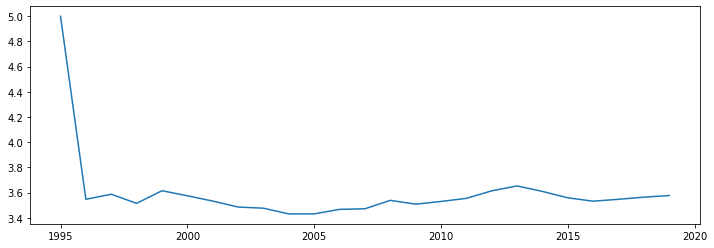

In [43]:
# let us visualize the series
df = df.reset_index()
plt.figure(figsize=(12,4))
plt.plot(df['year'],df['rating_mean'])
plt.savefig('average_ratings_peryear.jpg')

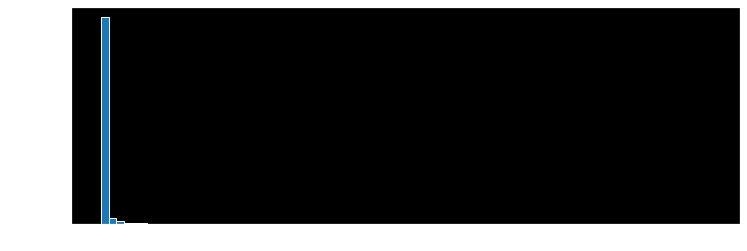

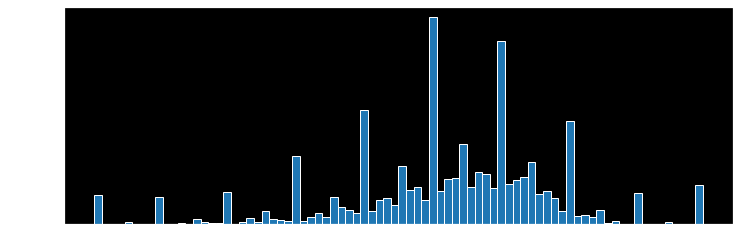

In [31]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline


plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:blue')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:blue')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

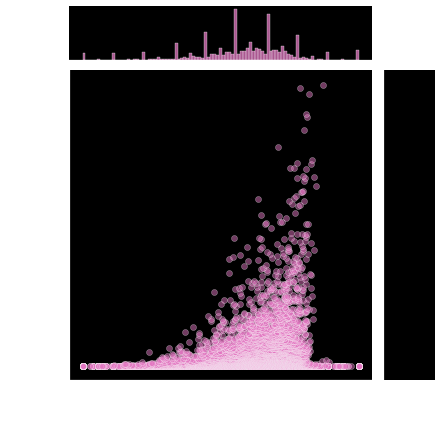

In [27]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

========================================

showing the count of all the ratings

In [46]:
#plotting bar chart to represent count per rating category
plt.figure(figsize =(10,5))
df4 = movies.groupby([movies['rating']]).agg({'count'})
#pd.DataFrame(movies.groupby('rating').size(), columns=['count']).plot(kind ='bar', color = 'purple')

<Figure size 720x360 with 0 Axes>

In [48]:

df4 = df4.droplevel(0, axis=1) 
column_names = df4.columns.values
column_names[2] = 'number'
df4.columns = column_names
df4 = df4.drop('count',axis=1)

<BarContainer object of 10 artists>

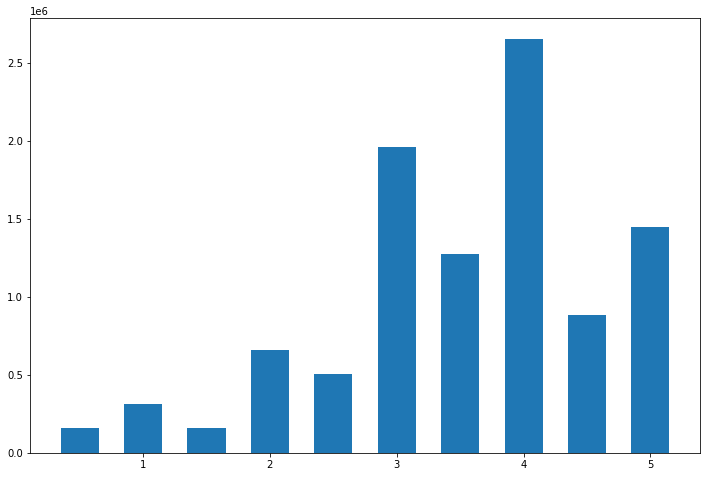

In [67]:
fig = plt.figure(figsize =(12, 8))
width = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,]
plt.bar(df4['rating'],df4['number'],width=width)

In [7]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

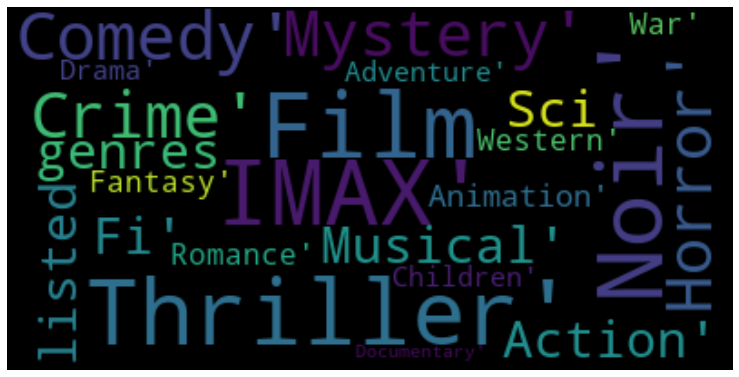

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = movies_genres['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()